In [98]:
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path 
import pandas as pd


plt.rcParams['font.family'] = 'Liberation serif'
plt.rcParams['font.size'] = 12     
plt.rcParams['axes.titlesize'] = 14         
plt.rcParams['axes.labelsize'] = 12       
np.set_printoptions(precision=2, suppress=True)      

base_dir = Path("graphs")
subdirs = ["1", "2", "3", "4"]

base_dir.mkdir(exist_ok=True)
for subdir in subdirs:
    (base_dir / subdir).mkdir(exist_ok=True)

data_1 = np.loadtxt('1.txt')
data_2 = np.loadtxt('2.txt')
data_3 = np.loadtxt('3.txt')
data_4 = np.loadtxt('4.txt')

# Строим входную характеристику $I_б = f(U_{бэ})$, при заданном $U_{кэ}$

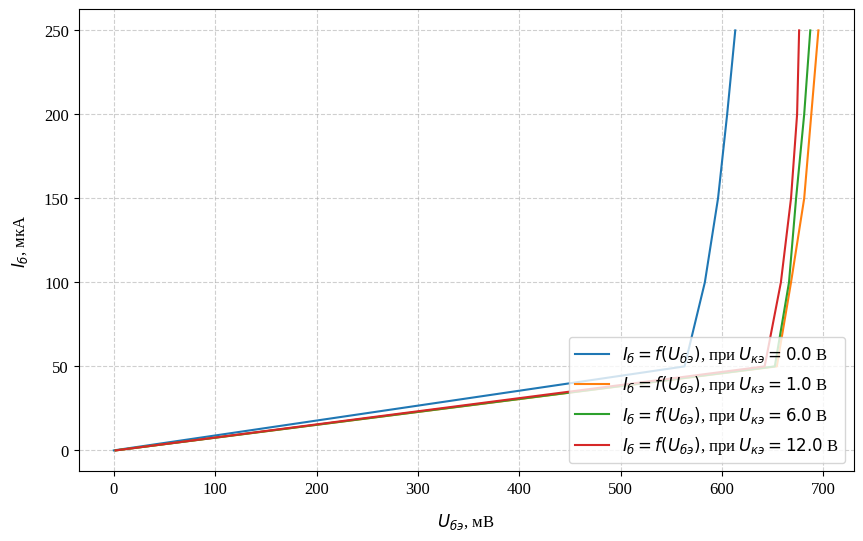

In [99]:
I_b = data_1[0, 1:]
U_ke = data_1[1:, 0]

plt.figure(figsize=(10, 6))
plt.grid(True,
        linestyle='--',
        alpha=0.6)
plt.xlabel(r"$U_{бэ}$, мВ", labelpad=10)
plt.ylabel(r"$I_{б}$, мкА", labelpad=10)

for i, row in enumerate(data_1[1:]):
    U_be = row[1:]
    plt.plot(U_be, I_b,
            linewidth=1.5,
            linestyle='-',
            label=f"$I_{{б}} = f(U_{{бэ}})$, при $U_{{кэ}} = {U_ke[i]}$ В")
plt.legend(loc='lower right', frameon=True)
plt.savefig(f"graphs/1/Входная_характеристика_{i+1}_{U_ke[i]}.svg", bbox_inches='tight' ,dpi=300)

# Строим выходную характеристику $I_к = f(U_{кэ})$, при заданном $I_б$

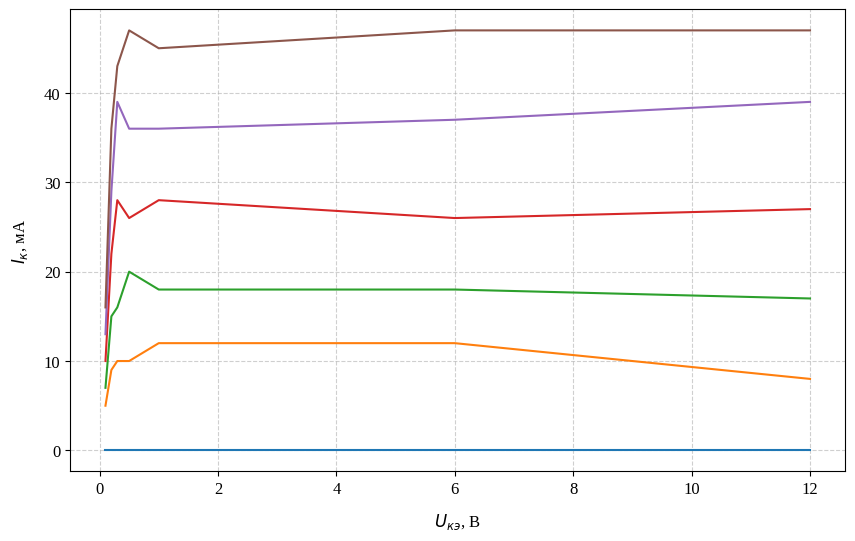

In [100]:
U_ke = data_2[1:, 0]

plt.figure(figsize=(10, 6))
plt.grid(True,
        linestyle='--',
        alpha=0.6)
plt.xlabel(r"$U_{кэ}$, В", labelpad=10)
plt.ylabel(r"$I_{к}$, мА", labelpad=10)

for i, col in enumerate(data_2.T[1:]):
    I_b = col[0]
    I_k = col[1:]
    plt.plot(U_ke, I_k,
            linewidth=1.5,
            linestyle='-',
            label=f"$I_{{к}} = f(U_{{кэ}})$, при $I_б = {I_b}$ мкА")

# Расчитаем $\beta$ (коэф. усиления) для каждого $U_{кэ}$

$$\beta = \frac {I_к} {I_б}$$

In [101]:
U_ke = data_2[1:, 0]
B = np.array([col[1:] / col[0] for col in data_2[:, 2:].T]).T
print("b values for all U_ke")
for u_ke, b in zip(U_ke, np.round(B, 2)):
    print(f"{u_ke=}\tb={str(b)}")
print("Average b values for all U_ke")
for u_ke, b in zip(U_ke, np.round(np.mean(B, axis=1), 3)):
    print(f"{u_ke=}\t{b=}")

b values for all U_ke
u_ke=np.float64(0.1)	b=[0.1  0.07 0.07 0.06 0.06]
u_ke=np.float64(0.2)	b=[0.18 0.15 0.15 0.14 0.14]
u_ke=np.float64(0.3)	b=[0.2  0.16 0.19 0.2  0.17]
u_ke=np.float64(0.5)	b=[0.2  0.2  0.17 0.18 0.19]
u_ke=np.float64(1.0)	b=[0.24 0.18 0.19 0.18 0.18]
u_ke=np.float64(6.0)	b=[0.24 0.18 0.17 0.18 0.19]
u_ke=np.float64(12.0)	b=[0.16 0.17 0.18 0.2  0.19]
Average b values for all U_ke
u_ke=np.float64(0.1)	b=np.float64(0.073)
u_ke=np.float64(0.2)	b=np.float64(0.153)
u_ke=np.float64(0.3)	b=np.float64(0.183)
u_ke=np.float64(0.5)	b=np.float64(0.188)
u_ke=np.float64(1.0)	b=np.float64(0.193)
u_ke=np.float64(6.0)	b=np.float64(0.193)
u_ke=np.float64(12.0)	b=np.float64(0.179)


# Построение стокозатворной характеристики биполярного транзистора

$$I_с = f(U_{зи})$$

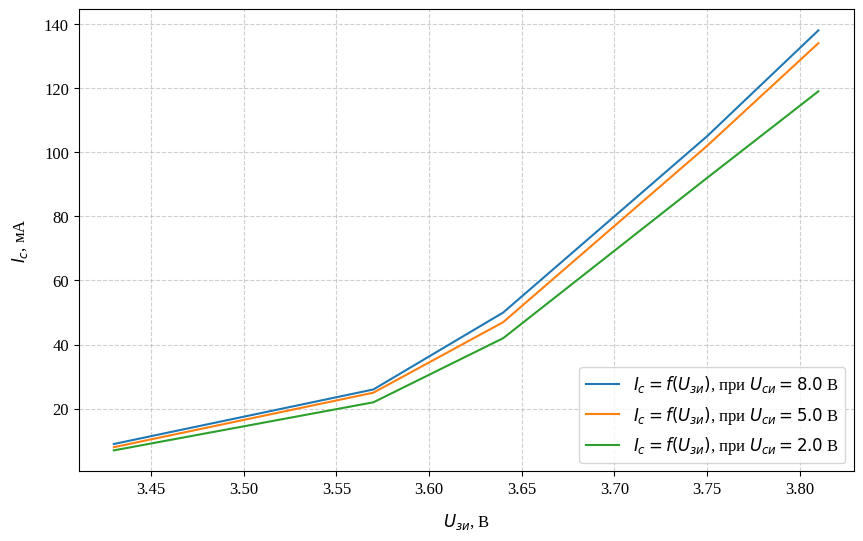

In [102]:
U_zi = data_3[1:, 0]
mask = np.array([col[0] in {2, 5, 8} for col in data_3.T])
plt.figure(figsize=(10, 6))
plt.grid(True,
            linestyle='--',
            alpha=0.6)
plt.xlabel(r"$U_{зи}$, В", labelpad=10)
plt.ylabel(r"$I_{с}$, мА", labelpad=10)
for i, col_data in enumerate(data_3[:, mask].T):
    U_si = col_data[0]
    I_c = col_data[1:]
    plt.plot(U_zi, I_c,
            linewidth=1.5,
            linestyle='-',
            label=f"$I_{{с}} = f(U_{{зи}})$, при $U_{{си}} = {U_si}$ В")
plt.legend(loc='lower right', frameon=True)
plt.savefig(f"graphs/3/Стокозатворная_характеристика_{i+1}_{U_si}.svg", bbox_inches='tight' ,dpi=300)

# Построение выходной характеристики биполярного транзистора

$$I_с = f(U_{си})$$

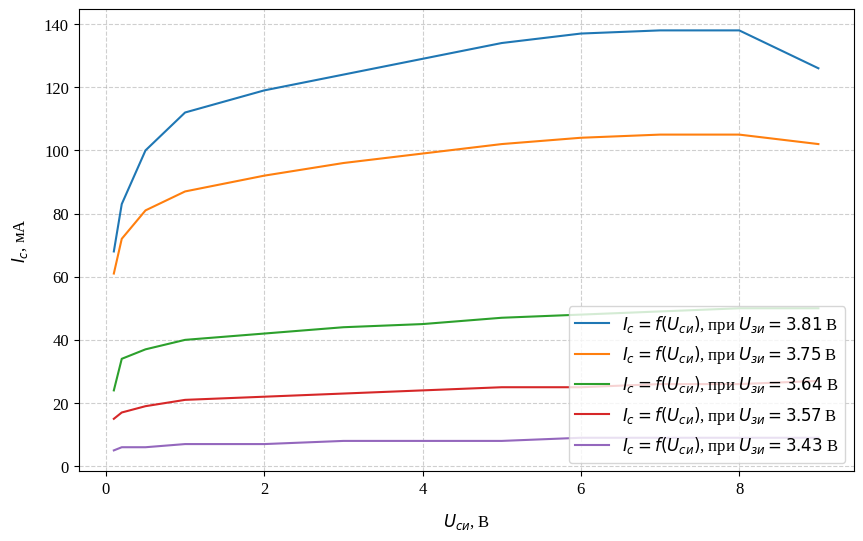

In [103]:
U_zi = data_3[1:, 0]
U_si = data_3[0, 1:]
plt.figure(figsize=(10, 6))
plt.grid(True,
        linestyle='--',
        alpha=0.6)
plt.xlabel(r"$U_{си}$, В", labelpad=10)
plt.ylabel(r"$I_{с}$, мА", labelpad=10)
for i, I_c in enumerate(data_3[1:, 1:]):
    plt.plot(U_si, I_c,
            linewidth=1.5,
            linestyle='-',
            label=f"$I_{{с}} = f(U_{{си}})$, при $U_{{зи}} = {U_zi[i]}$ В")
plt.legend(loc='lower right', frameon=True)
plt.savefig(f"graphs/4/Выходная_характеристика_{i+1}_{U_zi[i]}.svg", bbox_inches='tight' ,dpi=300)

# Таблица $U_{пор}$

In [104]:
U_por_table = pd.DataFrame(data_4, columns=["U_си", "U_пор"], index=range(1, len(data_4) + 1))
print(U_por_table)

    U_си  U_пор
1    9.0   3.27
2    8.0   3.27
3    7.0   3.27
4    6.0   3.27
5    5.0   3.27
6    4.0   3.27
7    3.0   3.27
8    2.0   3.27
9    1.0   3.27
10   0.5   3.28
11   0.2   3.27
12   0.1   3.27


# Расчёт крутизны $S$ полевого транзистотра

$$S=\frac {\Delta I_с} {\Delta U_{зи}}$$

In [105]:
delta_U_zi = np.diff(data_3[1:, 0])
delta_I_c = np.diff(data_3[1:, 1:], axis=0) / 1000
S = delta_I_c / delta_U_zi[:, np.newaxis]
for s in np.round(S, 3):
    print(*s, sep='\t')

0.4	0.55	0.55	0.55	0.533	0.5	0.467	0.45	0.417	0.317	0.183	0.117
0.473	0.5	0.509	0.509	0.5	0.491	0.473	0.455	0.427	0.4	0.345	0.336
0.329	0.343	0.329	0.329	0.314	0.3	0.3	0.286	0.271	0.257	0.243	0.129
0.129	0.121	0.121	0.114	0.121	0.114	0.107	0.107	0.1	0.093	0.079	0.071


# Расчёт омического сопративления

$$R_{ом} = \frac {U_{си}} {I_с}$$

In [106]:
U_si = data_3[0, 1:]
I_c = data_3[1:, 1:] / 1000
om_resistance = pd.DataFrame(np.divide(U_si, I_c))
om_resistance.columns = [n+1 for n in range(len(om_resistance.columns))]
print(np.round(om_resistance))

       1      2      3      4      5      6      7      8      9     10    11  \
0    71.0   58.0   51.0   44.0   37.0   31.0   24.0   17.0    9.0   5.0   2.0   
1    88.0   76.0   67.0   58.0   49.0   40.0   31.0   22.0   11.0   6.0   3.0   
2   180.0  160.0  143.0  125.0  106.0   89.0   68.0   48.0   25.0  14.0   6.0   
3   333.0  308.0  269.0  240.0  200.0  167.0  130.0   91.0   48.0  26.0  12.0   
4  1000.0  889.0  778.0  667.0  625.0  500.0  375.0  286.0  143.0  83.0  33.0   

     12  
0   1.0  
1   2.0  
2   4.0  
3   7.0  
4  20.0  


# Расчёт динамического сопративления

$$R_{дин}= \frac {\Delta U_{си}} {\Delta I_с}$$

In [107]:
delta_U_si = np.diff(data_3[0, 1:])
delta_I_c = np.diff(data_3[1:, 1:], axis=1) / 1000
dynamic_resistance = pd.DataFrame(np.divide(delta_U_si, delta_I_c, where=delta_I_c != 0))
dynamic_resistance.columns = [n+1 for n in range(len(dynamic_resistance.columns))]
print(np.round(dynamic_resistance, 2))

        1       2       3        4        5        6       7        8   \
0   -83.33     0.0  1000.0   333.33   200.00   200.00   200.0   142.86   
1  -333.33     0.0  1000.0   500.00   333.33   333.33   250.0   200.00   
2     0.00  1000.0  1000.0  1000.00   500.00  1000.00   500.0   500.00   
3  1000.00     0.0  1000.0     0.00  1000.00  1000.00  1000.0  1000.00   
4     0.00     0.0     0.0  1000.00     0.00     0.00  1000.0     0.00   

       9       10      11  
0   41.67   17.65    6.67  
1   83.33   33.33    9.09  
2  166.67  100.00   10.00  
3  250.00  150.00   50.00  
4  500.00    0.00  100.00  
